### ---

# Universidad de Costa Rica

### Facultad de Ingeniería

### Escuela de Ingeniería Eléctrica

#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---

# Tarea de programación 3:

*Estudiante:* **Laura Rojas**

*Carnet:* **B76798**

*Correo electrónico:* **laura.rojaszumbado@ucr.ac.cr**

---

## 1) A partir de los datos, encontrar la mejor curva de ajuste (modelo probabilístico) para las funciones de densidad marginales de X y Y
## 4.a) Graficar las funciones de densidad marginales.

Gracias a las gráficas anteriores es claro que la función indicada es la de Voigt: (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1)**2)/((2*sigmaG1)**2)))) +\((ampL1*widL1**2/((x-cenL1)**2+widL1**2)) 

Para x, los parámetros son: 
[0.09196859 9.97884707 7.40408187]
Para y, los parámetros son: 
[ 0.05792871 15.04820567  9.41186419]

Las graficas de Voigt corresponden a las gráficas de las funciones de mejor ajuste. Las funciones se grafican de forma separada de los datos utilizando el código anterior.


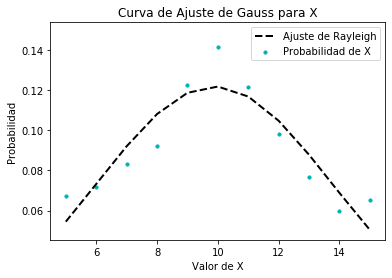

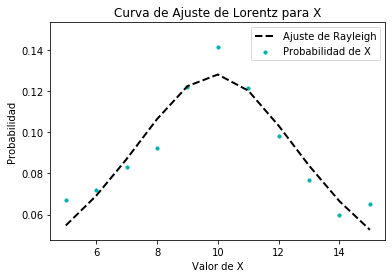

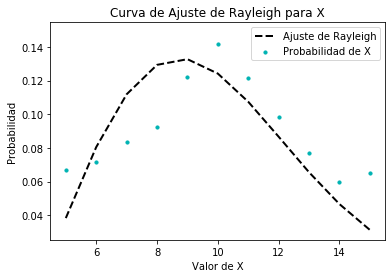

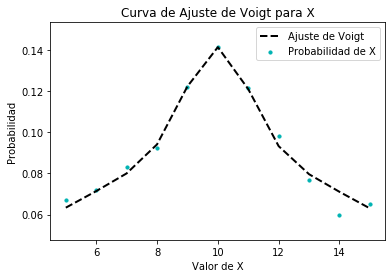

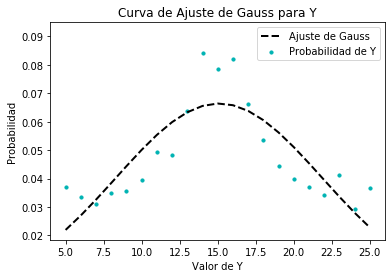

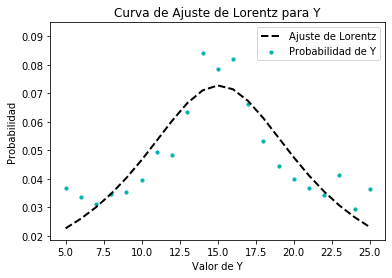

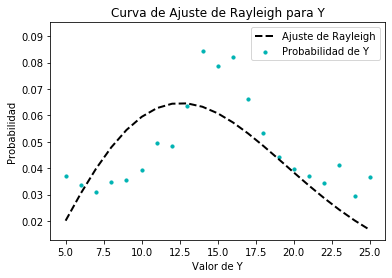

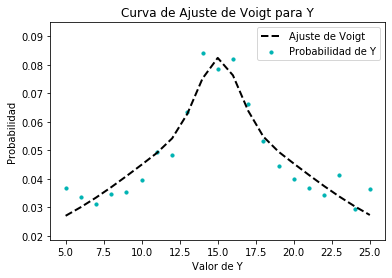

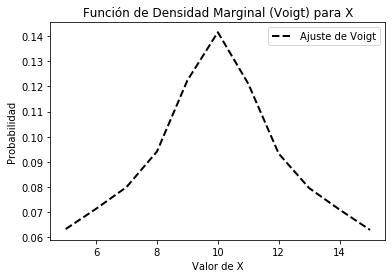

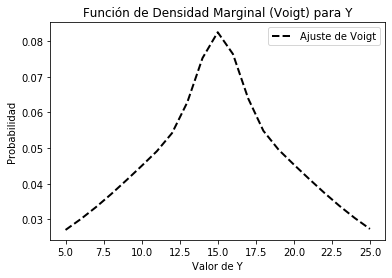

In [7]:
#importar bibliotecas de matplotlib, numpy y scipy
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import curve_fit
from scipy.stats import norm,rayleigh

# Función de Gauss para un pico dado (distribución normal)
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

# Función de Lorentz para un pico dado la amplitud, el centro y el ancho.
def lorentzian(x, amp1, cen1, wid1):
    return (amp1*wid1**2/((x-cen1)**2+wid1**2))

# Función Voigt de una función con un pico (suma de picos Gauss y Lorentz)
def voigt(x, ampG1, cenG1, widL1):
    ampL1 = ampG1 #asumimos que la amplitud de los picos de lorentz y gauss son iguales
    cenL1 = cenG1 #asumimos que los picos de lorentz y gauss se centran en el mismo punto
    sigmaG1 = 0.1*widL1 #asumimos proporción 1:10 entre sigma de Gauss y el ancho del pico de lorentz
    return (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1)**2)/((2*sigmaG1)**2)))) +\
              ((ampL1*widL1**2/((x-cenL1)**2+widL1**2)) )

# Función para encontrar la curva de ajuste
def curvaDeAjuste():
    #leer datos del archivo csv
    data = np.loadtxt("xy.csv", delimiter=',', skiprows=1, usecols=range(1,22))
    
    #inicializar probabilidades de "x" y "y" para formato histograma
    xProbabilities = [] #inicializar arreglo vacío de probabilidades de x
    xList = [] #inicializar arreglo vacío para lista horizontal de x
    xRayleighSamples = [] #inicializar sample list para Rayleigh
    yProbabilities = [] #inicializar arreglo vacío de probabilidades de y
    yList = [] #inicializar arreglo vacío para lista horizontal de y
    yRayleighSamples = [] #inicializar sample list para Rayleigh
    rayleighMultiplier = 100 #determinar multiplicador para longitud de lista de valores de rayleigh

    #recorrer rows x5-x15
    for i in range(5,16):
        xRow = data[i-5, :] #xi
        xVal = np.sum(xRow) #suma de valores
        xProbabilities.append(xVal)
        xList.append(i)
        temp = int(round(xVal*rayleighMultiplier)) #obtener valor temporal para datos de Rayleigh de distribución dada
        for j in range(0,temp):
            xRayleighSamples.append(i) #añadir otro datapoint correspondiente a i
              
    #recorrer columnas y5-y25
    for i in range(5,26):
        yCol = data[:,i-5] #yi
        yVal = np.sum(yCol) #suma de valores
        yProbabilities.append(yVal)
        yList.append(i)
        temp = int(round(xVal*rayleighMultiplier)) #obtener valor temporal para datos de Rayleigh de distribución dada
        for j in range(0,temp):
            yRayleighSamples.append(i) #añadir otro datapoint correspondiente a i    
    
 
    ## PARA  X
    
    # obtener fit data con curva gaussiana
    parsX, covX = curve_fit(f=gaussian, xdata=xList, ydata=xProbabilities, p0=[6,10,14], bounds=(-np.inf, np.inf))
    stdevsX = np.sqrt(np.diag(covX))
    #print(stdevsX)
    plt.figure() # Plot fit data Gaussiana como overlay en cima de los puntos ya determinados del histograma
    plt.scatter(xList, xProbabilities, s=10, color='#00b3b3', label='Data')
    plt.plot(xList, gaussian(xList, *parsX), linestyle='--', linewidth=2, color='black')
    plt.title('Curva de Ajuste de Gauss para X')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de X')
    plt.legend(['Ajuste de Rayleigh','Probabilidad de X'])
    plt.savefig('curvaAjuste_x_Gaussian.png') #guardar imagen en folder
    
    # obtener fit data con curva de lorentz (tiene pico más pronunciado)
    parsX, covX = curve_fit(f=lorentzian, xdata=xList, ydata=xProbabilities, p0=[0.14,10,4], bounds=(-np.inf, np.inf))
    stdevsX = np.sqrt(np.diag(covX))
    #print(stdevsX)
    plt.figure() # Plot fit data Lorentz como overlay en cima de los puntos ya determinados del histograma
    plt.scatter(xList, xProbabilities, s=10, color='#00b3b3', label='Data')
    plt.plot(xList, lorentzian(xList, *parsX), linestyle='--', linewidth=2, color='black')
    plt.title('Curva de Ajuste de Lorentz para X')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de X')
    plt.legend(['Ajuste de Rayleigh','Probabilidad de X'])
    plt.savefig('curvaAjuste_x_Lorentzian.png') #guardar imagen en folder
    
    # obtener fit data con curva de rayleigh (distribución normal con peso de un lado)
    param = rayleigh.fit(xRayleighSamples)
    pdf_fitted = rayleigh.pdf(xList,loc=param[0],scale=param[1])
    plt.figure()
    plt.scatter(xList, xProbabilities, s=10, color='#00b3b3', label='Data')
    plt.plot(xList,pdf_fitted, linestyle='--', linewidth=2, color='black')  
    plt.title('Curva de Ajuste de Rayleigh para X')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de X')
    plt.legend(['Ajuste de Rayleigh','Probabilidad de X'])
    plt.savefig('curvaAjuste_x_Rayleigh.png') #guardar imagen en folder
    
    # obtener fit data con curva voigt (distribución de Gauss y Lorentz con peso)
    parsX, covX = curve_fit(f=voigt, xdata=xList, ydata=xProbabilities, p0=[0.5,10,4], bounds=(-np.inf, np.inf))
    stdevsX = np.sqrt(np.diag(covX))
    #print(stdevsX)
    plt.figure() # Plot fit data Voigt como overlay en cima de los puntos ya determinados de probabilidades
    plt.scatter(xList, xProbabilities, s=10, color='#00b3b3', label='Data')
    plt.plot(xList, voigt(xList, *parsX), linestyle='--', linewidth=2, color='black')
    plt.title('Curva de Ajuste de Voigt para X')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de X')
    plt.legend(['Ajuste de Voigt','Probabilidad de X'])
    plt.savefig('curvaAjuste_x_Voigt.png') #guardar imagen en folder
    
    
    ## PARA  Y
    
    # obtener fit data con curva gaussiana (distribución normal)
    parsY, covY = curve_fit(f=gaussian, xdata=yList, ydata=yProbabilities, p0=[6,15,24], bounds=(-np.inf, np.inf))
    stdevsY = np.sqrt(np.diag(covY))
    plt.figure() # Plot fit data Gaussiana como overlay en cima de los puntos ya determinados del histograma
    plt.scatter(yList, yProbabilities, s=10, color='#00b3b3', label='Data')
    plt.plot(yList, gaussian(yList, *parsY), linestyle='--', linewidth=2, color='black')
    plt.title('Curva de Ajuste de Gauss para Y')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de Y')
    plt.legend(['Ajuste de Gauss','Probabilidad de Y'])
    plt.savefig('curvaAjuste_y_Gaussian.png') #guardar imagen en folder
    
    # obtener fit data con curva de lorentz (tiene pico más pronunciado)
    parsY, covY = curve_fit(f=lorentzian, xdata=yList, ydata=yProbabilities, p0=[0.14,15,2], bounds=(-np.inf, np.inf))
    stdevsY = np.sqrt(np.diag(covY))
    plt.figure() # Plot fit data Lorentz como overlay en cima de los puntos ya determinados del histograma
    plt.scatter(yList, yProbabilities, s=10, color='#00b3b3', label='Data')
    plt.plot(yList, lorentzian(yList, *parsY), linestyle='--', linewidth=2, color='black')
    plt.title('Curva de Ajuste de Lorentz para Y')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de Y')
    plt.legend(['Ajuste de Lorentz','Probabilidad de Y'])
    plt.savefig('curvaAjuste_y_Lorentzian.png') #guardar imagen en folder
    
    # obtener fit data con curva de rayleigh (distribución normal con peso de un lado)
    param = rayleigh.fit(yRayleighSamples)
    pdf_fitted = rayleigh.pdf(yList,loc=param[0],scale=param[1])
    plt.figure()
    plt.scatter(yList, yProbabilities, s=10, color='#00b3b3', label='Data')
    plt.plot(yList, pdf_fitted, linestyle='--', linewidth=2, color='black')  
    plt.title('Curva de Ajuste de Rayleigh para Y')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de Y')
    plt.legend(['Ajuste de Rayleigh','Probabilidad de Y'])
    plt.savefig('curvaAjuste_y_Rayleigh.png') #guardar imagen en folder
    
    # obtener fit data con curva voigt (distribución de Gauss y Lorentz con peso)
    parsY, covY = curve_fit(f=voigt, xdata=yList, ydata=yProbabilities, p0=[0.5,10,4], bounds=(-np.inf, np.inf))
    stdevsY = np.sqrt(np.diag(covY))
    plt.figure() # Plot fit data Voigt como overlay en cima de los puntos ya determinados de probabilidades
    plt.scatter(yList, yProbabilities, s=10, color='#00b3b3', label='Data')
    plt.plot(yList, voigt(yList, *parsY), linestyle='--', linewidth=2, color='black')
    plt.title('Curva de Ajuste de Voigt para Y')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de Y')
    plt.legend(['Ajuste de Voigt','Probabilidad de Y'])
    plt.savefig('curvaAjuste_y_Voigt.png') #guardar imagen en folder    
    
    print("Gracias a las gráficas anteriores es claro que la función indicada es la de Voigt: (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1)**2)/((2*sigmaG1)**2)))) +\((ampL1*widL1**2/((x-cenL1)**2+widL1**2)) \n\nPara x, los parámetros son: ")
    print(parsX)
    print("Para y, los parámetros son: ")
    print(parsY)
    
    print("\nLas graficas de Voigt corresponden a las gráficas de las funciones de mejor ajuste. Las funciones se grafican de forma separada de los datos utilizando el código anterior.")
    
    plt.figure() # Plot fit data Voigt como overlay en cima de los puntos ya determinados de probabilidades
    plt.plot(xList, voigt(xList, *parsX), linestyle='--', linewidth=2, color='black')
    plt.title('Función de Densidad Marginal (Voigt) para X')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de X')
    plt.legend(['Ajuste de Voigt'])
    plt.savefig('x_Voigt.png') #guardar imagen en folder
    
    plt.figure() # Plot fit data Voigt como overlay en cima de los puntos ya determinados de probabilidades
    plt.plot(yList, voigt(yList, *parsY), linestyle='--', linewidth=2, color='black')
    plt.title('Función de Densidad Marginal (Voigt) para Y')
    plt.ylabel('Probabilidad')
    plt.xlabel('Valor de Y')
    plt.legend(['Ajuste de Voigt'])
    plt.savefig('y_Voigt.png') #guardar imagen en folder    
    return

#suma de columnas (y) filas (x) da histograma de x y y. 
#curva de ajuste del histograma

#correr función de curva de ajuste
curvaDeAjuste()


## ¿Son independientes los datos? Diseñar una prueba de independencia para los datos disponibles.

In [78]:
#importar bibliotecas de pandas, matplotlib y numpy
import matplotlib.pyplot as plt
import numpy as np 


# Función para encontrar la curva de ajuste
def pruebaDeIndependencia():
    #leer datos del archivo csv
    data = np.loadtxt("xy.csv", delimiter=',', skiprows=1, usecols=range(1,22))
    
    #inicializar probabilidades de "x" y "y" para formato histograma
    xProbabilities = [] #inicializar arreglo vacío de probabilidades de x
    xList = [] #inicializar arreglo vacío para lista horizontal de x
    yProbabilities = [] #inicializar arreglo vacío de probabilidades de y
    yList = [] #inicializar arreglo vacío para lista horizontal de y

    #recorrer rows x5-x15 para obtener sus probabilidades
    for i in range(5,16):
        xRow = data[i-5, :] #xi
        xVal = np.sum(xRow) #suma de valores de X
        xProbabilities.append(xVal)
        xList.append(i)
              
    #recorrer columnas y5-y25 para obtener sus probabilidades
    for i in range(5,26):
        yCol = data[:,i-5] #yi
        yVal = np.sum(yCol) #suma de valores
        yProbabilities.append(yVal)
        yList.append(i)
       
    #formar nuevo arreglo para comprobar independencia
    arregloIndependencia = ["","y5","y6","y7","y8","y9","y10","y11","y12","y13","y14","y15","y16","y17","y18","y19","y20","y21","y22","y23","y24","y25"] #arreglo vacío
    n = 0.2 #definir porcentaje de cercanía (20%) para declarar dependencia o independencia
    print(arregloIndependencia) #imprimir primera fila
    #recorrer todas las filas
    for i in range(5,16):
        temprow = ["x"+str(i)] #inicializar nueva fila vacía
        #recorrer todas las columnas de cada fila
        for j in range (5,26):
            temp = xProbabilities[i-5]*yProbabilities[j-5] #multiplicar probabilidades de Xi y Yj
            if(data[i-5,j-5]*(1-n) < temp < data[i-5,j-5]*(1+n) ):
                temprow.append("I")
            else:
                temprow.append("D")
        arregloIndependencia.append(temprow)
        print(temprow) #imprimir cada fila de forma independiente
    
    #print explicación de resultados de la tabla
    print("\nGracias a la información dada en el arreglo anterior, se ve claramente que algunos datos son dependientes y otros son independientes. Se analiza con un márgen de error del 20%. Para efectos del siguiente punto, asumimos que los datos son independientes.")

    return #terminar función de prueba de independencia

pruebaDeIndependencia() #llamar función que comprueba la independencia





['', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'y21', 'y22', 'y23', 'y24', 'y25']
['x5', 'I', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'I', 'D', 'D', 'I', 'D', 'I', 'I', 'D', 'D', 'I', 'I', 'I', 'I']
['x6', 'D', 'D', 'I', 'D', 'D', 'D', 'I', 'I', 'I', 'D', 'D', 'D', 'D', 'I', 'I', 'I', 'D', 'D', 'D', 'D', 'D']
['x7', 'I', 'I', 'D', 'D', 'D', 'I', 'D', 'D', 'D', 'D', 'D', 'D', 'I', 'D', 'I', 'I', 'D', 'D', 'D', 'D', 'D']
['x8', 'I', 'D', 'D', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'D']
['x9', 'I', 'I', 'D', 'D', 'D', 'I', 'D', 'I', 'D', 'I', 'D', 'D', 'I', 'I', 'D', 'D', 'D', 'D', 'D', 'I', 'D']
['x10', 'D', 'D', 'I', 'D', 'I', 'D', 'D', 'I', 'D', 'D', 'D', 'D', 'D', 'I', 'I', 'I', 'D', 'D', 'D', 'D', 'D']
['x11', 'I', 'I', 'I', 'D', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'I', 'I', 'I', 'I', 'I', 'D', 'D', 'D', 'D', 'D']
['x12', 'D', 'I', 'D', 'D', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'I',

## 2) Si son independientes, ¿cuál es entonces la función de densidad conjunta que modela los datos?
## 4.b) Graficar la función de densidad conjunta.

Asumiendo que los datos son independientes, la función de densidad conjunta debe ser el producto de las dos funciones de densidad marginales calculadas anterioremente. Esto se grafica utilizando la herramienta mplot3d.


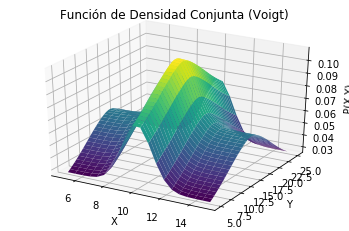

In [34]:
#importar bibliotecas de pandas, matplotlib y numpy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.optimize as optimize
import numpy as np 

# Función Voigt dependiente de X y Y, para graficar en 3D 
def voigt3D(x, y):
    #parametros de x
    ampL1x = 0.09196859;
    ampG1x = 0.09196859;
    cenL1x = 9.97884707;
    cenG1x = 9.97884707;
    widL1x = 7.40408187;
    sigmaG1x = 0.1*7.40408187;
    #parametros de y
    ampL1y = 0.05792871;
    ampG1y = 0.05792871;
    cenL1y = 15.04820567;
    cenG1y = 15.04820567;
    widL1y = 9.41186419;
    sigmaG1y = 0.1*9.41186419;
    return (  (ampG1x*(1/(sigmaG1x*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1x)**2)/((2*sigmaG1x)**2)))) +\
              ((ampL1x*widL1x**2/((x-cenL1x)**2+widL1x**2)) )  *   (ampG1y*(1/(sigmaG1y*(np.sqrt(2*np.pi))))*(np.exp(-((y-cenG1y)**2)/((2*sigmaG1y)**2)))) +\
              ((ampL1y*widL1y**2/((y-cenL1y)**2+widL1y**2)) ) )

# Función para encontrar la curva de ajuste
def fDensidadConjunta():
    print("Asumiendo que los datos son independientes, la función de densidad conjunta debe ser el producto de las dos funciones de densidad marginales calculadas anterioremente. Esto se grafica utilizando la herramienta mplot3d.")
    
    #initialize xList and yList
    xList = np.linspace(5, 15, 20)
    yList = np.linspace(5, 25, 40)
    X, Y = np.meshgrid(xList, yList)
        
    #obtener Z
    Z = voigt3D(X, Y)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    plt.title('Función de Densidad Conjunta (Voigt)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('P(X,Y)');
    plt.savefig('densidadConjunta.png') #guardar imagen en folder    
  
    
    return
                    


fDensidadConjunta()

## 3) Hallar los valores de correlación, covarianza y coeficiente de correlación (Pearson). Explicar su significado.

In [77]:
#importar bibliotecas de pandas, matplotlib y numpy
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import numpy as np

#función que calcula la correlación y covarianza
def correlacionYcovarianza():
    #leer datos del archivo csv
    data = np.loadtxt("xyp.csv", delimiter=',', skiprows=1, usecols=range(0,3))
    
    print("La correlación se define como la suma de: (Xi - Xprom)(Yi - Yprom)/n-1, donde Xi es el valor de X, Xprom el promedio de X, n el número de datos totales, y Y igual para la otra variable Y. Se hace esto para los", data.size, "datos en el archivo xyp.csv\n")
    
    #calcular valores promeidos
    Xprom = np.mean(data[:,0])
    Yprom = np.mean(data[:,1])
    Zprom = np.mean(data[:,2])
    cov = 0
    cor = 0
    sx = 0
    sy = 0
    
    #recorrer todo el arreglo de datos
    for i in range(0,int(data.size/3)):
        mult1 = data[i,0]*data[i,1]*data[i,2] #para cálculo de covarianza
        mult2 = (data[i,0]-Xprom)*(data[i,1]-Yprom)*data[i,2] #para cálculo de correlación
        mult3 = (data[i,0]-Xprom)**2 #para cálculo de desviación estándar x
        mult4 = (data[i,0]-Xprom)**2 #para cálculo de desviación estándar y
        cov = cov + mult1
        cor = cor + mult2
        sx = sx + mult3
        sy = sy + mult4

    #imprimir covarianza  
    print("La covarianza es de:", cov, "\nEste valor representa el grado de variación entre X y Y respecto a sus medias.")
    print("\nLa correlación es de:", cor, "\nEste valor indica la proporcionalidad entre X y Y.")
    
    #calcular desviación estándar
    sx = np.sqrt(sx/(data.size/3))
    sy = np.sqrt(sy/(data.size/3))
    
    #coeficiente de correlación (Pearson) es la covarianza entre el producto de las desviaciones estándar
    pearson = cov/(sx*sy)
    print("\nEl coeficiente de correlación (Pearson) es de:", pearson, "\nEste dato mide la dependencia lineal entre los valores de X y Y.")
    

    return

#llamar a la función que calcula la correlación y covarianza
correlacionYcovarianza()


La correlación se define como la suma de: (Xi - Xprom)(Yi - Yprom)/n-1, donde Xi es el valor de X, Xprom el promedio de X, n el número de datos totales, y Y igual para la otra variable Y. Se hace esto para los 693 datos en el archivo xyp.csv

La covarianza es de: 149.54281000000012 
Este valor representa el grado de variación entre X y Y respecto a sus medias.

La correlación es de: 0.06481000000000012 
Este valor indica la proporcionalidad entre X y Y.

El coeficiente de correlación (Pearson) es de: 14.954281000000009 
Este dato mide la dependencia lineal entre los valores de X y Y.
